In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
class s_parameter():
  def __init__(self, s, norm = None):
    self.s  = np.asarray(s,  dtype='float')
    self.norm = norm
    if norm:
      self.normalization()
    else:
      self.s0, self.s1, self.s2, self.s3 = self.s
    self.dop = self.dopc()

  def normalization(self):
    try:
      self.s /= self.s[0]
      print('Normalizing the array with respect to s0')
    except Exception as error:
      print(error)
    self.s0, self.s1, self.s2, self.s3 = self.s
  
  def dopc(self):
    return np.sqrt(self.s1**2 + self.s2**2 + self.s3**2 )/(self.s0)
  
  def poincare_plt(self, size = [6.00, 6.00], s= None):
    plt.rcParams["figure.figsize"] = size
    # Creating the sphere
    
    #3D (sphere)
    u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)

    #2D (archs)
    theta = np.linspace(0, 2*np.pi, 60)
    x1 = np.zeros_like(theta)
    y1 = np.cos(theta) 
    z1 = np.sin(theta) 
    
    
    #Set colours and render
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.plot_surface(x, y, z,alpha=0.3)

    ax.plot(y1,z1, 'k--')    # xy
    ax.plot(x1,y1,z1, 'k--') # yz
    ax.plot(y1,x1,z1, 'k--') # xz

    if s:
      #ax.scatter(*s,color="r", s = 100) # s-point
      ax.scatter(s[1], s[0], s[2],color="r", s = 100) # s-point
    else:
      ax.scatter(self.s2, self.s1, self.s3,color="r", s = 100) # s-point

    ax.set_xlabel('S2', fontsize=18)
    ax.set_ylabel('S1', fontsize=18)
    ax.set_zlabel('S3', fontsize=18)
    ax.tick_params(axis='both', labelsize=8)

    plt.tight_layout()
    plt.show()
  
  def IPD(self, alpha):
    self.I_ = (1/2)*(self.s0 + self.s1*np.cos(2*alpha)/2- self.s2*np.sin(2*alpha)/2 + self.s1*np.cos(6*alpha)/2 + self.s2*np.sin(6*alpha)/2 + self.s3*np.sin(4*alpha))
    plt.plot(alpha/np.pi, self.I_, label = 'Photodiodensignal')
    plt.xlabel('\u03B1/\u03C0', fontsize = 15)
    plt.xlim((0, 2))
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('IPD', fontsize = 15)
    plt.legend()
    plt.tight_layout()
    plt.show()
    return self.I_
  
  def fourier(self, IPD, alpha):
    N = len(alpha)
    dwt = alpha[1] - alpha[0]
    FFT = np.fft.fft(IPD)
    FFT = FFT[range(int(N/2))]/N # Exclude sampling frequency
    FFT = np.fft.fftshift(FFT)
    #f = np.fft.fftfreq(N, dwt)
    angle = np.angle(FFT)
    abs = np.absolute(FFT)
    f = np.fft.fftshift(np.fft.fftfreq(N//2, dwt))
    return FFT, abs, angle,  f

  def plot_fourier(self, IPD, alpha):
    FFT, abs, angle,  f = self.fourier(IPD, alpha)
    koeffs=abs[abs>0.01]
    f = f[abs>0.01]
    labels = ['F{}'.format(2*i) for i in range(len(koeffs))]
    plt.stem( f, koeffs, use_line_collection=True)
    plt.xticks(f,labels, fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlim((0, np.max(f)+1))
    plt.ylabel('Fourier-Koeffizienten', fontsize = 15)
    plt.tight_layout()
    plt.show()

  def calculate_from_fft(self, FFT, abs):
    koeffs=FFT[abs>0.01]
    print('Koeffizienten = ',koeffs)
    s0 = 2*koeffs[0].real
    s1 = 4*(koeffs[1]+koeffs[3]).real
    s2 = 4*(koeffs[1]-koeffs[3]).imag
    s3 = -4*koeffs[2].imag
    #print(s0, s1,s2,s3)
    return s0, s1,s2,s3

  def calculate_from_coeffs(self, alpha):
    IPD = (1/2)*(self.s0 + self.s1*np.cos(2*alpha)/2- self.s2*np.sin(2*alpha)/2 + self.s1*np.cos(6*alpha)/2 + self.s2*np.sin(6*alpha)/2 + self.s3*np.sin(4*alpha))
    N = len(alpha)
    FFT = np.fft.fft(IPD)
    FFT = FFT[range(int(N/2))]/N
    FFT = np.fft.fftshift(FFT)
    angle = np.angle(FFT)
    abs = np.absolute(FFT)  
    koeffs=FFT[abs>0.01]
    print('Koeffizienten = ',koeffs)
    s0 = 2*koeffs[0].real
    s1 = 4*(koeffs[1]+koeffs[3]).real
    s2 = 4*(koeffs[1]-koeffs[3]).imag
    s3 = -4*koeffs[2].imag
    return s0, s1,s2,s3

  def Ipdfromfft(self, FFT, f):
    I_PD = np.fft.ifft(FFT)
    return 

# Stokes-Parameter

\
\begin{equation} 
S_{PD} = \begin{bmatrix}
            S_0 \\
            S_1 \\
            S_2 \\
            S_3 \\
        \end{bmatrix} = \begin{bmatrix}
            1 \\
            0,636 \\
            -0,545 \\
            0,545 \\
        \end{bmatrix}
\end{equation}


In [ ]:
s2 = np.array(([1,0.636,-0.545,0.545]))
parameter = s_parameter(s2, norm = True)

Normalizing the array with respect to s0


SOP

In [ ]:
parameter.dop

0.9992727355432051

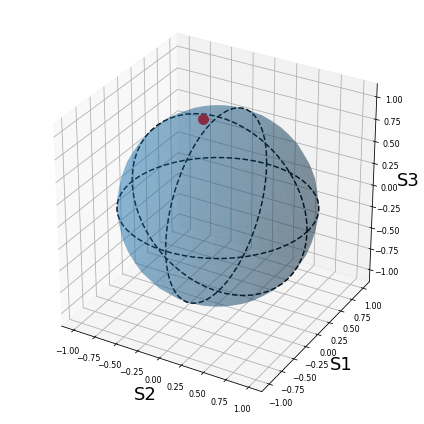

In [ ]:
parameter.poincare_plt()

Beliebig $\alpha$

In [ ]:
f_s = 1024//2
alpha = np.linspace(0,2*np.pi,2*f_s)


$I_{PD}$ aus den Stokes-Parametern:

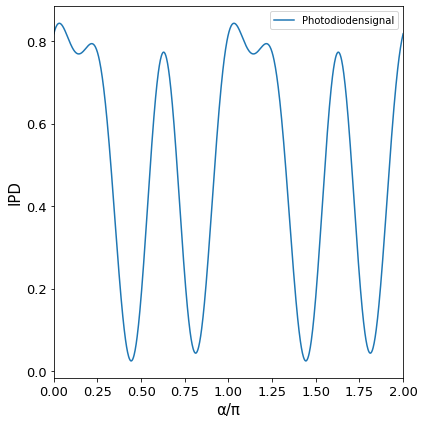

In [ ]:
I_PD = parameter.IPD(alpha)

FFT

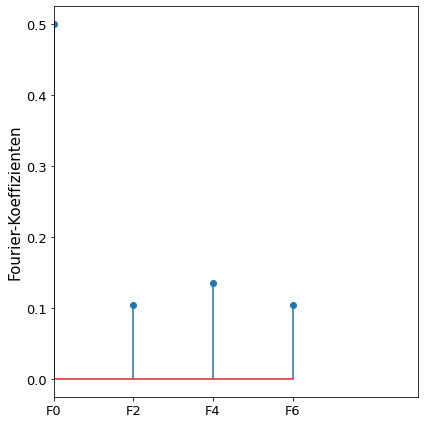

In [ ]:
parameter.plot_fourier(I_PD, alpha)

Berechnung der Stokes-Parameter aus der FFT

In [ ]:
s0, s1,s2,s3 = parameter.calculate_from_coeffs(alpha)
print(s0, s1,s2,s3)

Koeffizienten =  [0.50031055+0.j         0.08013006-0.06772818j 0.00189523-0.13591889j
 0.07824134+0.06990998j]
1.00062109375 0.6334855756786548 -0.5505526405857564 0.5436755408108247


Poincaré-Kugel mit den berechneten Stokes-Parameter

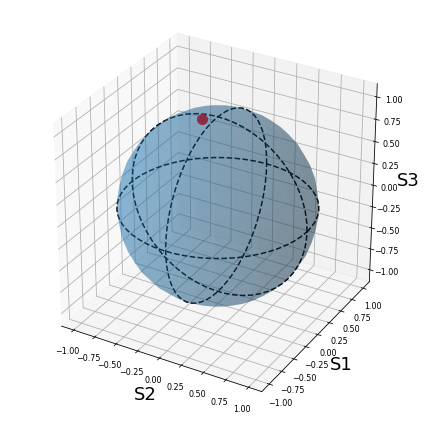

In [ ]:
parameter.poincare_plt(s=[s1, s2, s3])

Fall 
\
\begin{equation} 
S_{PD} = \begin{bmatrix}
            S_0 \\
            S_1 \\
            S_2 \\
            S_3 \\
        \end{bmatrix} = \begin{bmatrix}
            1 \\
            0,2 \\
            -0,65 \\
            0,35 \\
        \end{bmatrix}
\end{equation}

Normalizing the array with respect to s0


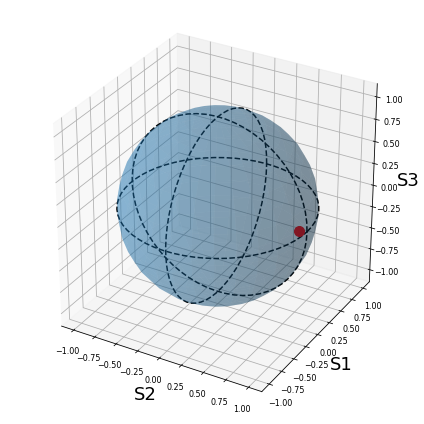

In [ ]:
s3 = np.array(([1,0.5,0.65,-0.35]))
parameter = s_parameter(s3, norm = True)
parameter.poincare_plt()

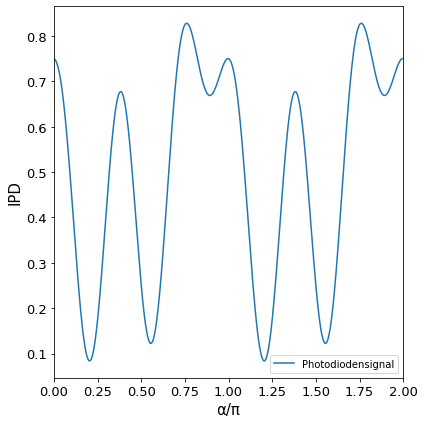

In [ ]:
I_PD = parameter.IPD(alpha)

Koeffizienten =  [ 0.50024414+0.j          0.06216763+0.0816471j  -0.00089101+0.08715478j
  0.06400073-0.08030645j]
1.00048828125 0.5046734386830349 0.6478141971088793 -0.3486191236582413


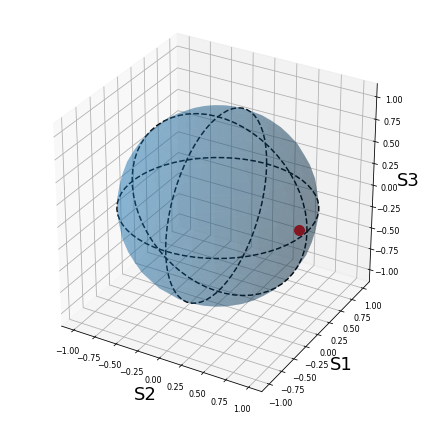

In [ ]:
s0, s1,s2,s3 = parameter.calculate_from_coeffs(alpha)
print(s0, s1,s2,s3)
parameter.poincare_plt(s=[s1, s2, s3])